In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

In [3]:
vaccine_file_path = '../Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx'
vaccine_data = pd.read_excel(vaccine_file_path, sheet_name='Vaccinerade kommun och ålder')

vaccine_display = {
    "info": vaccine_data.info(),
    "header": vaccine_data.head(5),
    "vac": vaccine_data.describe(include='all'),
    "value_counts": vaccine_data.value_counts(),
    "col": vaccine_data.columns,
    "index": vaccine_data.index
}
vaccine_display

# vaccine_data['Ålder'] = vaccine_data['Ålder'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Län                  2900 non-null   int64  
 1   Län_namn             2900 non-null   object 
 2   Kommun               2900 non-null   int64  
 3   Kommun_namn          2900 non-null   object 
 4   Ålder                2900 non-null   object 
 5   Befolkning           2900 non-null   int64  
 6   Antal minst 1 dos    2900 non-null   int64  
 7   Antal minst 2 doser  2900 non-null   int64  
 8   Antal 3 doser        2320 non-null   float64
 9   Antal 4 doser        870 non-null    float64
 10  Andel minst 1 dos    2900 non-null   float64
 11  Andel minst 2 doser  2900 non-null   float64
 12  Andel 3 doser        2320 non-null   float64
 13  Andel 4 doser        870 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 317.3+ KB


{'info': None,
 'header':    Län        Län_namn  Kommun     Kommun_namn  Ålder  Befolkning  \
 0    1  Stockholms län     114  Upplands Väsby  12-15        2422   
 1    1  Stockholms län     114  Upplands Väsby  16-17        1203   
 2    1  Stockholms län     114  Upplands Väsby  18-29        6692   
 3    1  Stockholms län     114  Upplands Väsby  30-39        7332   
 4    1  Stockholms län     114  Upplands Väsby  40-49        6946   
 
    Antal minst 1 dos  Antal minst 2 doser  Antal 3 doser  Antal 4 doser  \
 0               1206                 1046            NaN            NaN   
 1                839                  755            NaN            NaN   
 2               4887                 4469         1959.0            NaN   
 3               5542                 5240         2878.0            NaN   
 4               5592                 5429         3719.0            NaN   
 
    Andel minst 1 dos  Andel minst 2 doser  Andel 3 doser  Andel 4 doser  
 0           0.49793

In [4]:

dict= {
    "unique counties": vaccine_data['Län'].nunique(),
    "unique municipalities": vaccine_data['Kommun'].nunique(),
    "represented population": vaccine_data['Befolkning'].sum(),
}
dict

print(f'There is {dict["unique counties"]} counties in Sweden and those counties have a total of {dict["unique municipalities"]} municipalities.')
print(f"This Data set is represented of {dict['represented population']} entires")

There is 21 counties in Sweden and those counties have a total of 290 municipalities.
This Data set is represented of 9092790 entires


In [36]:
vac_data = vaccine_data[(vaccine_data['Ålder'] == '12-15') | (vaccine_data['Ålder'] == '16-17')]

sum_vac_data = vac_data['Befolkning'].sum()
print(f"The population which is younger than 18 years of age is {sum_vac_data} which got vaccine")

The population which is younger than 18 years of age is 745370 which got vaccine


C:\Users\Kevin\AppData\Local\Temp\ipykernel_13736\1311852418.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_distribution.index, y=age_distribution.values, palette="viridis")


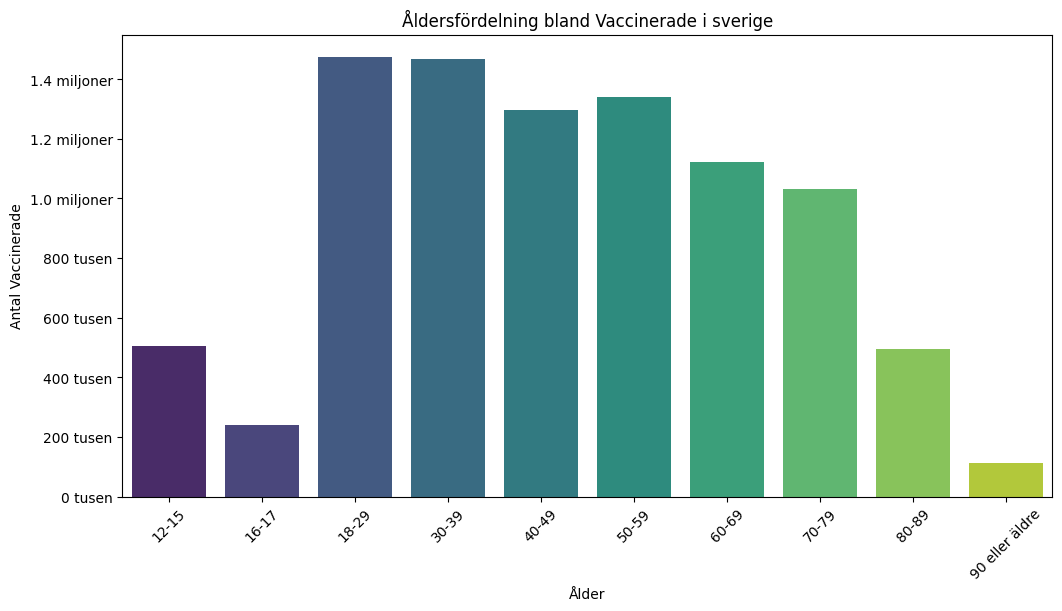

In [13]:
age_distribution = vaccine_data.groupby('Ålder')['Befolkning'].sum()

def thousand_setter(x, pos):
    if x < 1000000:
        return f'{int(x/1000)} tusen'
    else:
        return f'{x/1000000:.1f} miljoner'

plt.figure(figsize=(12, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values, palette="viridis")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(thousand_setter))
plt.title('Åldersfördelning bland Vaccinerade i sverige')
plt.xlabel('Ålder')
plt.ylabel('Antal Vaccinerade')
plt.xticks(rotation=45)
plt.savefig('../Data/Visualizeringar/Age_between_all_vaccinated.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

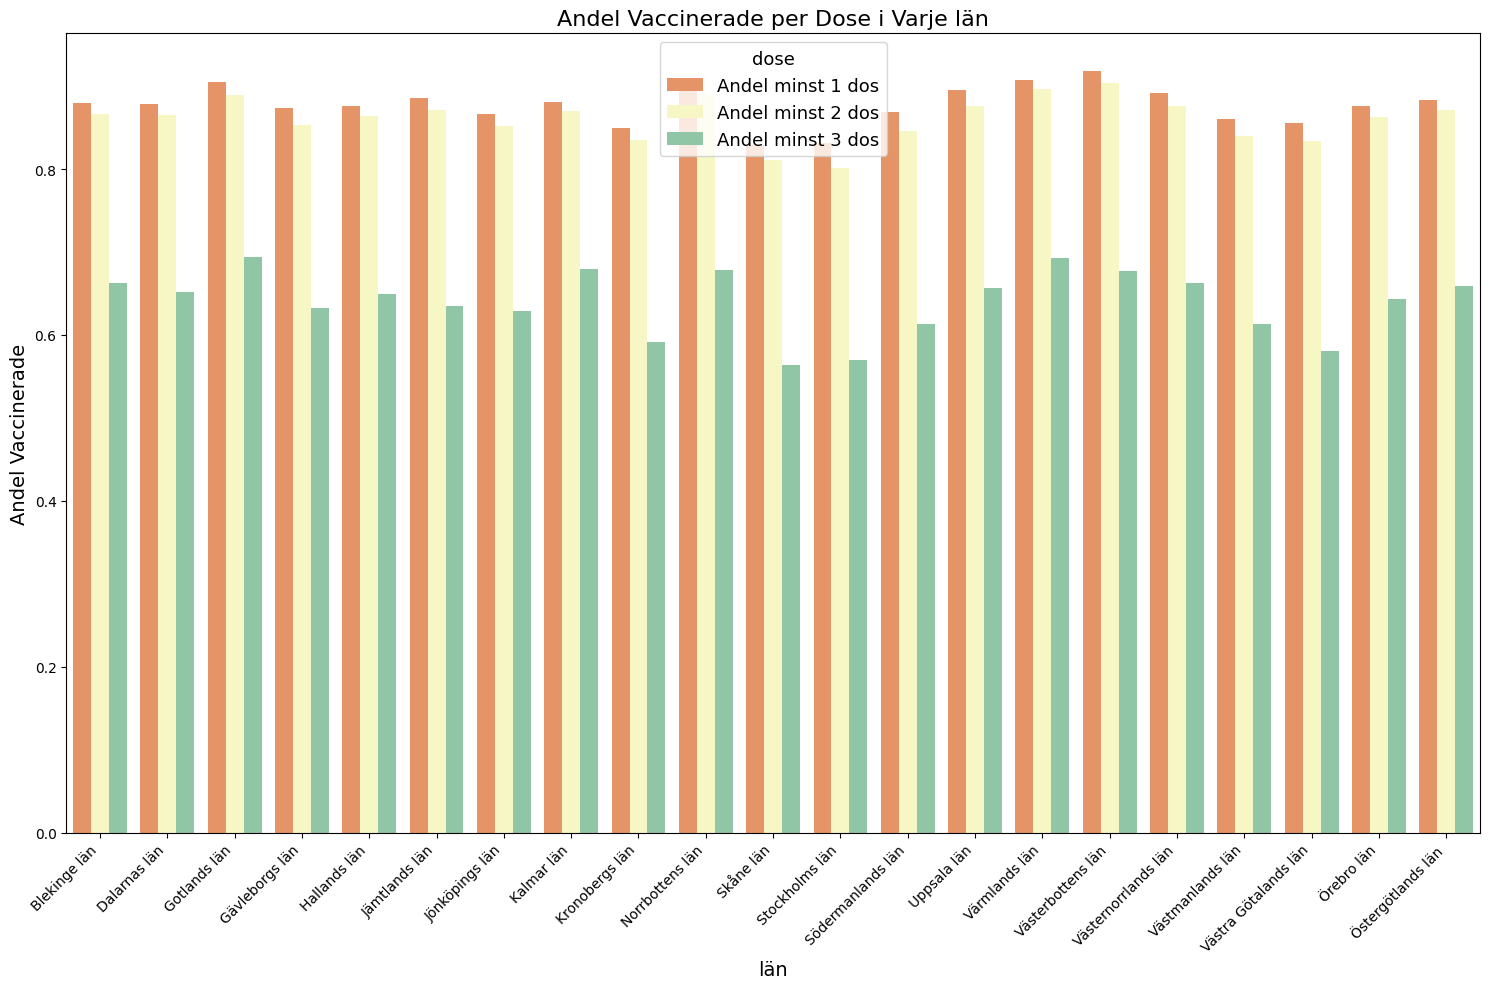

In [42]:
Procentage_each_vaccine_dose = vaccine_data.groupby('Län_namn').sum()

plt.figure(figsize=(12, 8))

Procentage_each_vaccine_dose = Procentage_each_vaccine_dose[['Antal minst 1 dos', 'Antal minst 2 doser', 'Antal 3 doser', 'Befolkning']]

Procentage_each_vaccine_dose['Andel minst 1 dos'] = Procentage_each_vaccine_dose['Antal minst 1 dos'] / Procentage_each_vaccine_dose['Befolkning']
Procentage_each_vaccine_dose['Andel minst 2 dos'] = Procentage_each_vaccine_dose['Antal minst 2 doser'] / Procentage_each_vaccine_dose['Befolkning']
Procentage_each_vaccine_dose['Andel minst 3 dos'] = Procentage_each_vaccine_dose['Antal 3 doser'] / Procentage_each_vaccine_dose['Befolkning']

Procentage_each_vaccine_dose = Procentage_each_vaccine_dose.reset_index()

Procentage_each_vaccine_dose = Procentage_each_vaccine_dose.drop(columns=['Antal minst 1 dos', 'Antal minst 2 doser', 'Antal 3 doser', 'Befolkning'])

plt.figure(figsize=(15, 10))

melted_data = Procentage_each_vaccine_dose.melt(id_vars=['Län_namn'], var_name='Dose', value_name='Antal')

sns.barplot(x='Län_namn', y='Antal', hue='Dose', data=melted_data, palette="Spectral")

plt.title('Andel Vaccinerade per Dose i Varje län', fontsize=16)
plt.xlabel('län', fontsize= 14)
plt.ylabel('Andel Vaccinerade', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.legend(title='dose', title_fontsize='13', fontsize='13')

plt.savefig('../Data/Visualizeringar/Total_vaccinated_each_counties_in(%).png')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

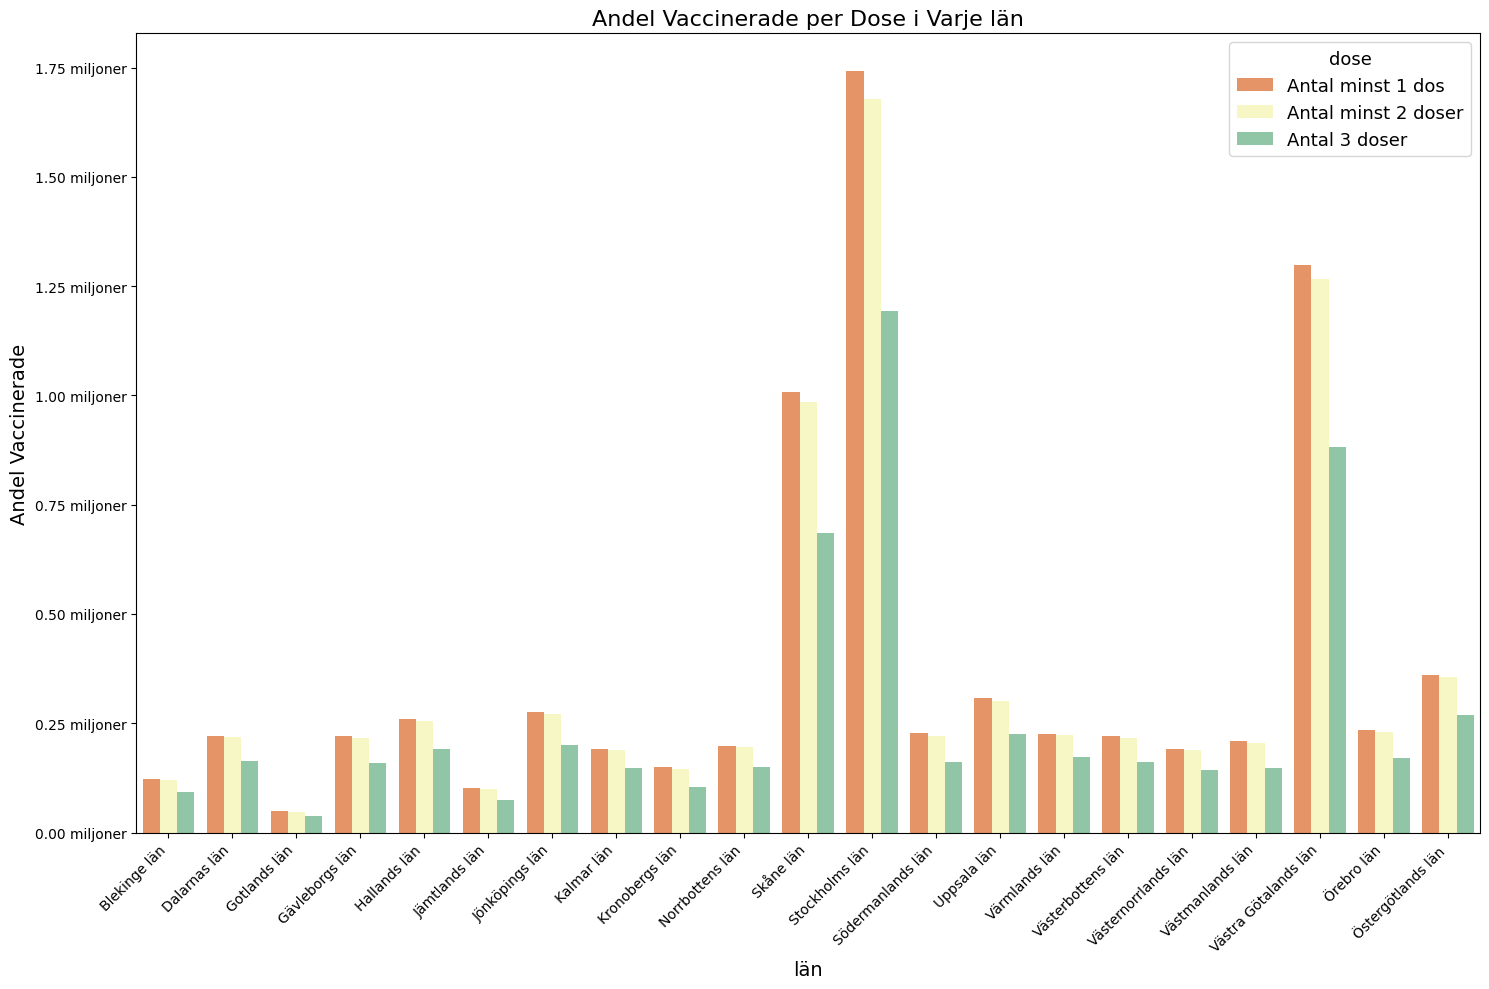

In [41]:
total_vaccines_by_doses = vaccine_data.groupby('Län_namn').sum()


plt.figure(figsize=(12, 8))

total_vaccines_by_doses = total_vaccines_by_doses[['Antal minst 1 dos', 'Antal minst 2 doser', 'Antal 3 doser',]]

def total_vaccines(x, pos):
    return f"{x/1000000:.2f} miljoner"
total_vaccines_by_doses = total_vaccines_by_doses.reset_index()

total_vaccines_by_doses.head(22)

plt.figure(figsize=(15, 10))

melted_vaccine_data = total_vaccines_by_doses.melt(id_vars=['Län_namn'], var_name='Dose', value_name='Antal')

sns.barplot(x='Län_namn', y='Antal', hue='Dose', data=melted_vaccine_data, palette="Spectral")

plt.title('Andel Vaccinerade per Dose i Varje län', fontsize=16)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(total_vaccines))
plt.xlabel('län', fontsize= 14)
plt.ylabel('Andel Vaccinerade', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.legend(title='dose', title_fontsize='13', fontsize='13')

plt.savefig('../Data/Visualizeringar/Total_vaccinated_each_counties.png')
plt.tight_layout()
plt.show()

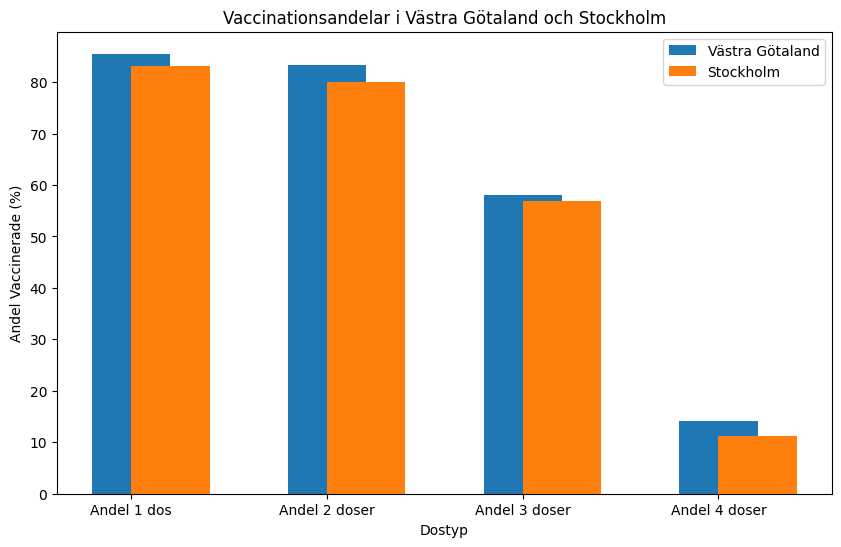

In [11]:
västra_götaland_data = vaccine_data[vaccine_data['Län_namn'] == 'Västra Götalands län']
stockholm_data = vaccine_data[vaccine_data['Län_namn'] == 'Stockholms län']

def calculate_dose_percentages(data):
    total_population = data['Befolkning'].sum()
    percentages = {
        'Andel 1 dos': data['Antal minst 1 dos'].sum() / total_population,
        'Andel 2 doser': data['Antal minst 2 doser'].sum() / total_population,
        'Andel 3 doser': data['Antal 3 doser'].sum() / total_population,
        'Andel 4 doser': data['Antal 4 doser'].sum() / total_population
    }
    return percentages

västra_götaland_percentages = calculate_dose_percentages(västra_götaland_data)
stockholm_percentages = calculate_dose_percentages(stockholm_data)

labels = list(västra_götaland_percentages.keys())
västra_götaland_values = list(västra_götaland_percentages.values())
stockholm_values = list(stockholm_percentages.values())

x = range(len(labels))

plt.figure(figsize=(10, 6))

plt.bar(x, [val * 100 for val in västra_götaland_values], width=0.4, label='Västra Götaland', align='center')
plt.bar(x, [val * 100 for val in stockholm_values], width=0.4, label='Stockholm', align='edge')

plt.xlabel('Dostyp')
plt.ylabel('Andel Vaccinerade (%)')
plt.title('Vaccinationsandelar i Västra Götaland och Stockholm')
plt.xticks(x, labels)
plt.legend()

plt.savefig('../Data/Visualizeringar/vaccinationsandelar.png')

plt.show()


